
# Project: Investigation of TMDb movie dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This is an exploring analysis of a movie dataset generated from The Movie Database (TMDb), it provides details on movies and their credit through the period 1960 - 2015. The analysis includes 3 main parts as follows:-
>
> A- Film Industry Analysis
        - Is there growth in the film industry over years?
        - When are the profitable seasons over the year?
        - Is there an association between the budget and the profit?
B- Movies Analysis
        - What is the most produced movie's genre?
        - What are the top ten profitable movies?
        - What is the most popular movie?
C- Crew Analysis
        - Who are the top ten actors, directors, production companies according to the number of movies?

In [1]:
# import the packages that will be used in investigation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Load the data csv file 
df= pd.read_csv('tmdb-movies.csv')

In [3]:
# Perform operations to inspect data types and look for missing or possibly errant data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# Check for duplicates in the whole dataset
sum (df.duplicated())

1

#### Assessment: 
>- dtype of id column change from int to string
>- dtype of budget and revenue column change from int to float
>- dtype of release_date column change from string to date time
>- duplication drop
>- nulls drop

### Data Cleaning

### Change the dtype of id, budget, revenue, and release date

In [5]:
# convert the id dtype from int to string
df['id']= df['id'].astype(str)

In [6]:
# convert 'budget' dtype from int to float
df['budget']= df['budget'].astype(float)

In [7]:
# convert 'revenue' dtype from int to float
df['revenue']= df['revenue'].astype(float)

In [8]:
# convert 'release_date' dtype from string to datetime 
df['release_date']= pd.to_datetime(df['release_date'])

In [9]:
# Check the code result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null object
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj  

### Drop the columns that are not involved in the analysis

In [10]:
# the columns (imdb_id, homepage, tagline, keywords, overview) will not be included in the analysis, so will be dropped
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis= 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
id                      10866 non-null object
popularity              10866 non-null float64
budget                  10866 non-null float64
revenue                 10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(6)
memory usage: 1.3+ MB


### Drop missing values

In [11]:
# drop the null values
df.dropna(inplace= True)

In [12]:
# confirm the result
df.isna().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [13]:
# check the shape of the dataframe
df.shape

(9773, 16)

<a id='eda'></a>
## Exploratory Data Analysis




### A- Film Industry Analysis

### - Is there growth in the film industry over years?

> This question will be answered through investigating :- 

####  a- the total budgets, revenues, and profit over time

In [14]:
# Calculate the profit in a new column
df['profit']= df['revenue'] - df['budget']

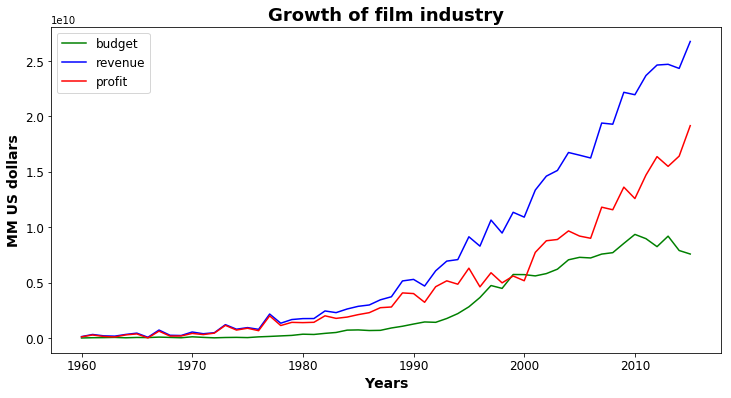

In [15]:
# Define a function calculating the totals per year
def yearly_total(column):
    total= df.groupby('release_year')[column].sum()
    return total

# Calculate the total budget, revenue, profit over years using yearly_total() function
year_budget= yearly_total('budget') 
year_revenue= yearly_total('revenue') 
year_profit= yearly_total('profit')

# Plot a line chart for the total budget, revenue, profit over time
year_budget.plot(kind= 'line', color= 'g', figsize= (12,6), fontsize= 12)
year_revenue.plot(kind= 'line', color= 'b')
year_profit.plot(kind= 'line', color= 'r')
plt.ylabel('MM US dollars', fontsize= 14, weight= 'bold')
plt.xlabel('Years', fontsize= 14, weight= 'bold')
plt.legend(fontsize= 12)
plt.title('Growth of film industry', fontsize=(18), weight= 'bold');

####  b- the total count of movies produced over time

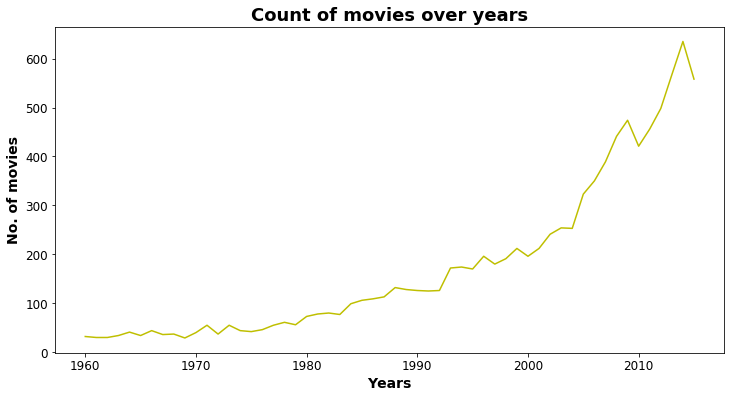

In [16]:
# Calculate the count of movies produced in each year
movies_count= df.groupby('release_year').id.count()


# Plot a line chart for the total count of profitable movies over time
movies_count.plot(kind= 'line', color= 'y',figsize= (12,6), fontsize= 12)
plt.ylabel('No. of movies', fontsize= 14, weight= 'bold')
plt.xlabel('Years', fontsize= 14, weight= 'bold')
plt.title('Count of movies over years', fontsize=(18), weight= 'bold');

#### Observations: 
>The data revealed a growth in the budgets, revenues, and profits of the movies across time, as well as an obvious increase in the number of movies produced from year to year, indicating the development and growth of the film industry. 

### - When are the profitable seasons over the year?

In [17]:
# Extract the month from the release_date in a new column
df['release_month'] = df['release_date'].dt.month

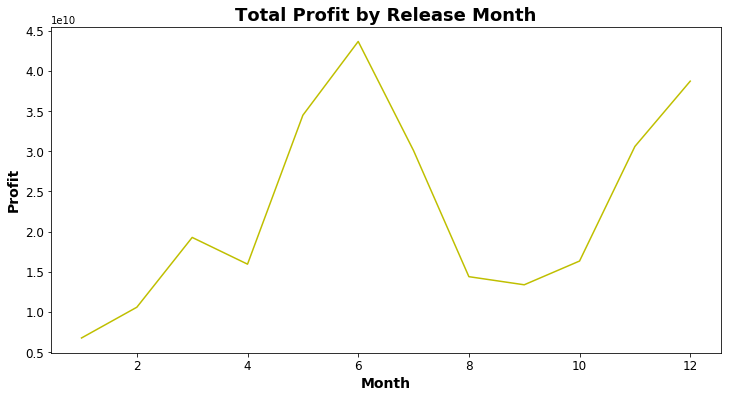

In [18]:
# calculate the monthly total profit  
monthly_profit= df.groupby('release_month').profit.sum()

# Plot a line chart for the total count of movies over time
monthly_profit.plot(kind= 'line', color= 'y',figsize= (12,6), fontsize= 12)
plt.xlabel('Month', fontsize= 14, weight= 'bold')
plt.ylabel('Profit', fontsize= 14, weight= 'bold')
plt.title('Total Profit by Release Month', fontsize=(18), weight= 'bold');

#### Observations: 
>The line chart shows that June and December are the most profitable seasons throughout the year. 

### - Is there an association between the budget and the profit?

Text(0,0.5,'Profit')

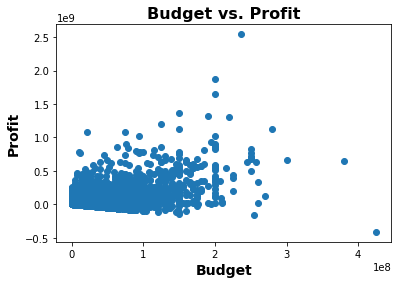

In [19]:
# Plot the correlation between budget and profit 
plt.scatter(x=df["budget"], y=df["profit"])
plt.title("Budget vs. Profit",fontsize=16, weight='bold')
plt.xlabel("Budget", fontsize=14, weight='bold')
plt.ylabel("Profit", fontsize=14, weight='bold')

#### Observations: 
>The scatter plot representspositive correlation between the budget and the profit.

### B- Movies Analysis

### - What is the most produced movie's genre?

In [20]:
# Define a function to separate the data in genres column and count the number of movies in each genre 
def data_count(column):
    split_data = pd.Series(column.str.cat(sep = '|').split('|'))
    count_data = split_data.value_counts()
    return count_data

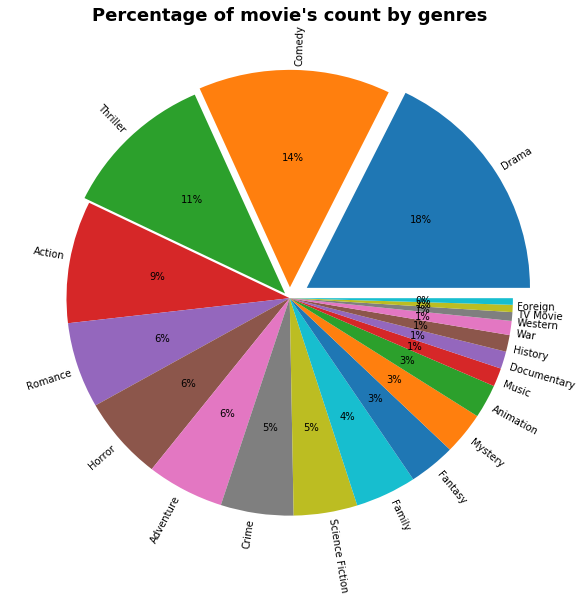

In [21]:
# plot the number of movies in each genre
genres_count= data_count(df['genres'])
labels= genres_count.index
explode = (0.09, 0.05, 0.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
genres_count.plot(kind='pie', explode=explode, labels=labels, rotatelabels=True, autopct='%1.0f%%', labeldistance= 1.02, figsize= (10,10), fontsize= 10)
plt.ylabel('')
plt.title("Percentage of movie's count by genres", fontsize=18, weight= 'bold');

#### Observations: 
> Drama movies are the most produced genre representing 18% of the total produced movies, followed by comedy movies which represent 14% of the total produced movies, and thriller movies that represent 11%.

### - What are the top ten profitable movies ?

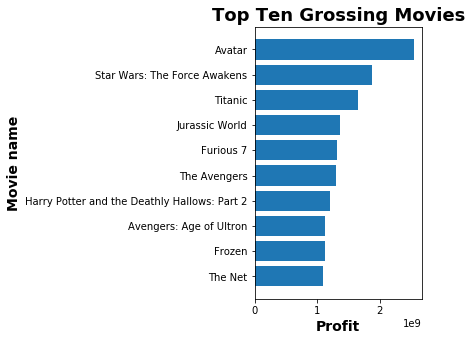

In [22]:
# sort the data by profit and find the top ten movies by profit 
df= df.sort_values(by= ['profit'], ascending= True)
top_ten_profits= df.profit.tail(10)
top_ten_movies= df.original_title.tail(10)

# plot the top ten movies by profit
locations=[1,2,3,4,5,6,7,8,9,10]
hights= top_ten_profits
labels= top_ten_movies
plt.figure(figsize=(3,5))
plt.barh(locations, hights, tick_label= labels)
plt.ylabel('Movie name', fontsize= 14, weight= 'bold')
plt.xlabel('Profit', fontsize= 14, weight= 'bold')
plt.title('Top Ten Grossing Movies', fontsize=(18), weight= 'bold');

In [23]:
# explore the details of the most profitable movie
most_profitable= df.query('profit == profit.max()')
most_profitable

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
1386,19995,9.432768,237000000.0,2.781506e+09,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,2.544506e+09,12


### - What is the most popular movie?

In [24]:
# explore the details of the highest popularity movie
most_popular= df.query('popularity == popularity.max()')
most_popular

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,release_month
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,6


#### Observations: 
> The most profitable movie is the action and adventure movie "Avatar" for Sam Worthington, and Zoe Saldana. Directed by James Cameron, and produced by Ingenious Film Partners. However, the most popular movie is the action and adventure movie “Jurassic World” for Chris Pratt, and Bryce Dallas. Directed by Colin Trevorrow, and produced by Universal Studios.

## C- Crew analysis

### - Who are the top ten actors, directors, production companies according to the number of movies?

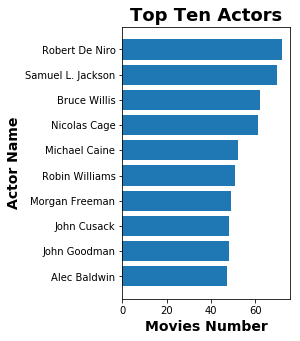

In [25]:
#define a function to find the top ten by movies count
def top_ten(column):
    count= data_count(df[column])
    top_ten= count.head(10).sort_values(ascending= True)
    return top_ten
    
# Explore the top ten actors by count of movies
top_ten_actors= top_ten('cast')

# plot the top ten actors
locations=[1,2,3,4,5,6,7,8,9,10]
hights= top_ten_actors.values
labels= top_ten_actors.index
plt.figure(figsize=(3,5))
plt.barh(locations, hights, tick_label= labels)
plt.ylabel('Actor Name', fontsize= 14, weight= 'bold')
plt.xlabel('Movies Number', fontsize= 14, weight= 'bold')
plt.title('Top Ten Actors', fontsize=(18), weight= 'bold');

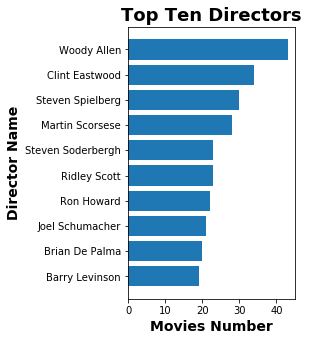

In [26]:
# Explore the top ten directors by count of directed movies
top_ten_directors= top_ten('director')

# plot the top ten directors
locations=[1,2,3,4,5,6,7,8,9,10]
hights= top_ten_directors.values
labels= top_ten_directors.index
plt.figure(figsize=(3,5))
plt.barh(locations, hights, tick_label= labels)
plt.ylabel('Director Name', fontsize= 14, weight= 'bold')
plt.xlabel('Movies Number', fontsize= 14, weight= 'bold')
plt.title('Top Ten Directors', fontsize=(18), weight= 'bold');

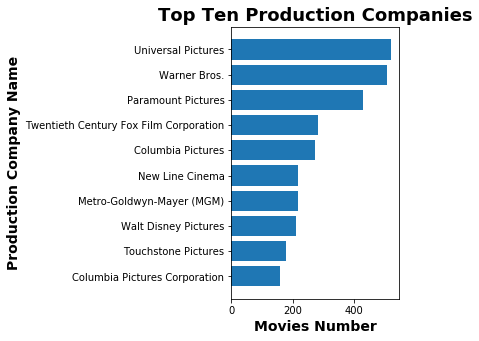

In [27]:
# Explore the top ten production companies by count of the produced movies
top_ten_prodco= top_ten('production_companies')

# plot the top ten production companies
locations=[1,2,3,4,5,6,7,8,9,10]
hights= top_ten_prodco.values
labels= top_ten_prodco.index
plt.figure(figsize=(3,5))
plt.barh(locations, hights, tick_label= labels)
plt.ylabel('Production Company Name', fontsize= 14, weight= 'bold')
plt.xlabel('Movies Number', fontsize= 14, weight= 'bold')
plt.title('Top Ten Production Companies', fontsize=(18), weight= 'bold');

<a id='conclusions'></a>
## Conclusions

> -	 The film industry grows and makes increasing profits across time.
> -	The most profitable season in June.
> -	There is a positive association between budget and profit.
> -	Drama movies are the most produced genre.
> - The most profitable movie is the action and adventure movie "Avatar" for Sam Worthington, and Zoe Saldana. Directed by James Cameron, and produced by Ingenious Film Partners.
> -	The most popular movie is the action and adventure movie “Jurassic World” for Chris Pratt, and Bryce Dallas. Directed by Colin Trevorrow, and produced by Universal Studios.
> -	Robert De Niro played the highest number of movies.
> -	Woody Allen directed the highest number of movies.
> -	Universal Picture Co. is the highest producing company.


### Limitations

> - Voting counts are varying, which result in unfair voting average for the movies.
> - It is not clear whether the zero budget records are missing data or not, and treating them as missing decreases the records in the dataset and produce inaccurate analysis.
> - The cast and director columns are not categorized by gender.
> - The analysis doesn't involve social media followers for the actors.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0